<a href="https://colab.research.google.com/github/lucianosilva-github/visaocomputacional/blob/master/Aula%2008/Visa%CC%83o_Computacional_Aula_08_SOLUC%CC%A7O%CC%83ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VISÃO COMPUTACIONAL - AULA 08**

**Objetivos da aula:**

*   conhecer o processo de transformação de uma imagem do domínio espacial para o domínio da frequencia, via Transformada de Fourier
*   implementar a Transformada de Fourier Unidimensional
*   implementar a Transformada de Fourier Rápida
*   implementar a Transformada de Fourier Bidimensional










**DOMÍNIO DA FREQUENCIA**

Diversos problemas em Visão Computacional e Processamento Digital de Imagens podem ser melhor abordados quanto transformamos uma imagem do **domínio espacial** para o **domínio da frequencia**. Por exemplo, bluring de imagens pode ser visto como um filtro passa-baixas (só deixamos passar as frequencia baixas da imagem transformada).


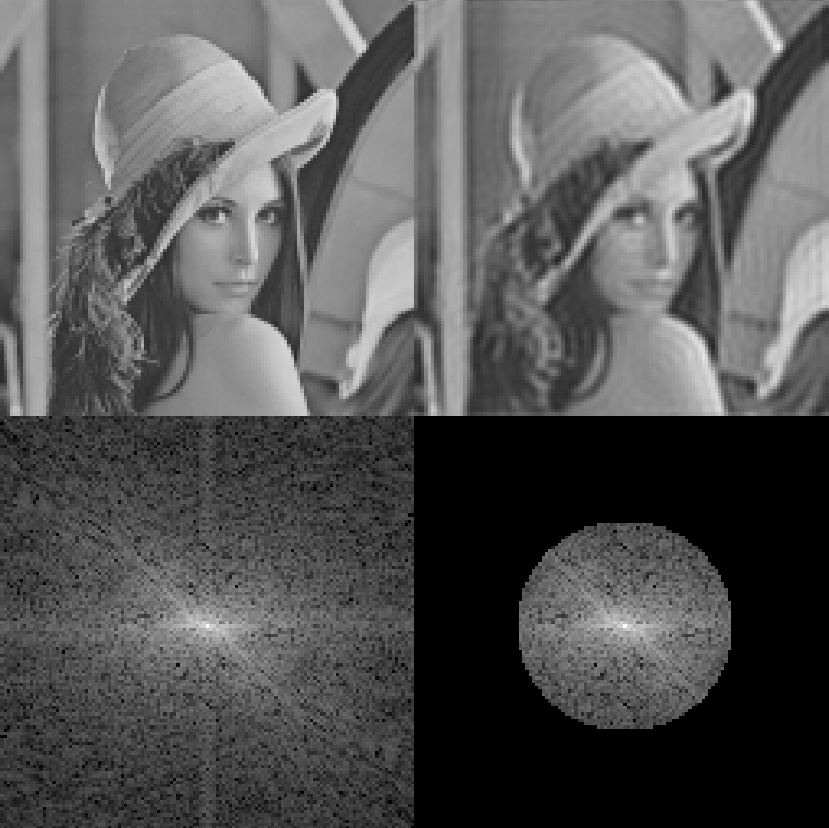

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('fourier.png')
cv2_imshow(img)


Existem diversos procedimentos para transformar uma imagem do domínio especial para o domínio da frequencia:

*   Transformada de Fourier
*   Transformada de Fourier com janela
*   Transformada de Wavelet




**TRANSFORMADA DE FOURIER UNIDIMENSIONAL**

A Transformada de Fourier é uma transformada integral que expressa uma função em termos de funções de base sinusoidal. A transformada de Fourier de uma função temporal é uma função de valor complexo da frequência, cujo valor absoluto representa a soma das frequências presente na função original e cujo argumento complexo é a fase de deslocamento da base sinusoidal naquela frequência.

Abaixo, temos a expressão desta transformada (e sua inversa) para um sinal unidimensional:

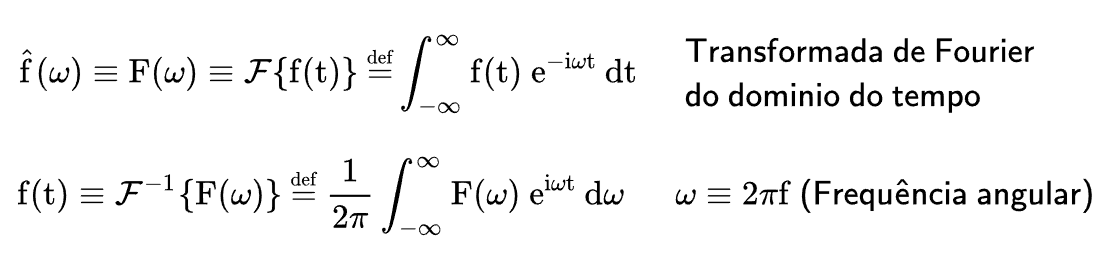

In [ ]:
img = cv.imread('fourieruni.png')
cv2_imshow(img)

A fórmula acima é chamada **Transformada de Fourier Contínua**. Quando trabalhamos com sinais digitais, a integral é transformada numa somatória, conforme mostrado abaixo. Esta transformada é chamada DFT (Discrete Fourier Transform).

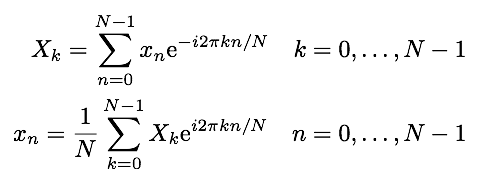

In [ ]:
img = cv.imread('fourierdiscrete.png')
cv2_imshow(img)

**EXERCÍCIO**

Implemente as funções **dft(x)** e **idft(t)** mostradas abaixo, que calculem a transformada discreta e discreta inversa de fourier de um vetor numérico x e t,respectivamente. Sugestão: use o módulo **cmath** do Python que permite a manipulação de números complexos.

In [1]:
#implementação do Carlos Eduardo Dip

from cmath import exp, pi

def dft(x):
  #implemente seu código aqui e retorne a transformada em t
  t = [0]*len(x)
  for k in range(len(x)):
    t[k] = sum([x[i]*exp(-2j*pi*k*i/len(x)) for i in range(len(x))])
  return t

def idft(t):
  #implemente seu código aqui e retorne a inversa da transformada em x
  x = [0] * len(t)
  for k in range(len(t)):
    x[k] = 1/len(t) * sum([t[i]*exp(2j*pi*k*i/len(t)) for i in range(len(t))])
  return x


In [2]:
t=dft([1+0j,1+0j,1+0j,1+0j])
print(t)
print(idft(t))

[(4+0j), (-1.8369701987210297e-16-2.220446049250313e-16j), -2.449293598294706e-16j, (3.2904645469127765e-16-3.3306690738754696e-16j)]
[(1-2.0001021803551222e-16j), (0.9999999999999999-6.695352868347749e-17j), (0.9999999999999999+7.754553812077694e-17j), (1+1.8941820859821277e-16j)]


O módulo numpy já possui uma implementação bastante eficiente da Transformada de Fourier, chamada **FFT (Fast Fourier Transform)**. Esta implementação usa uma estratégia do tipo butterfly pasra acelerar os cálculos dos coeficientes da transformada (e sua inversa).

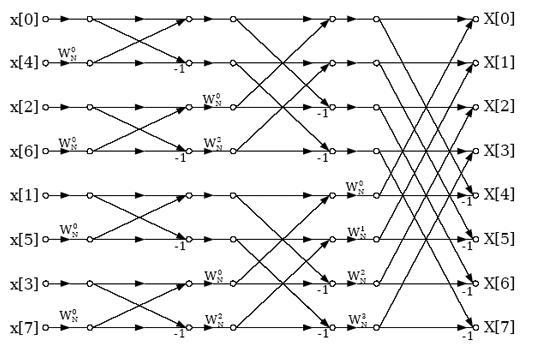

In [ ]:
img = cv.imread('fft.png')
cv2_imshow(img)

Uma implementação recursiva da fft está mostrada abaixo:

In [3]:
from cmath import exp, pi

def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]
           
print(fft([1,1,1,1,0,0,0,0]))

[(4+0j), (1-2.414213562373095j), 0j, (1-0.4142135623730949j), 0j, (0.9999999999999999+0.4142135623730949j), 0j, (0.9999999999999997+2.414213562373095j)]


Para calcular a Transformada Rápida de Fourier em Python, utilizamos o método fft do submódulo fft do numpy.

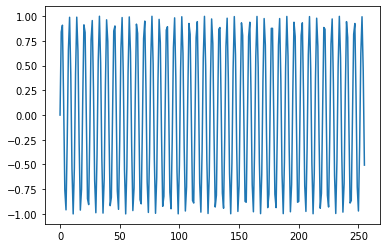

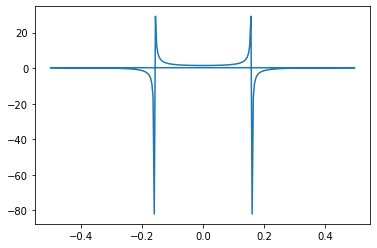

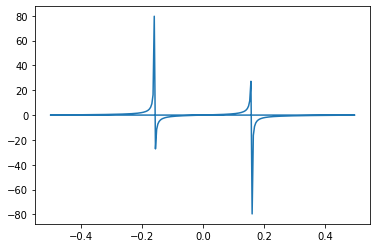

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t=np.arange(256)
x=np.sin(t)
plt.plot(t,x)
plt.show()
ft=np.fft.fft(x)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq,ft.real)
plt.show()
plt.plot(freq,ft.imag)
plt.show()

Para calcular a inversa, utilizamos o método ifft.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


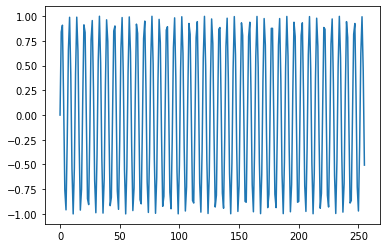

In [ ]:
t=np.arange(256)
x=np.fft.ifft(ft)
plt.plot(t,x)
plt.show()

**TRANSFORMADA DE FOURIER BIDIMENSIONAL**

Imagens também podem ser vistas como sinais, porém especificadas como uma **função bidimensional** f(x,y). Neste caso, a Transformada de Fourier toma uma forma mais complexa, com o uso de duas integrais.

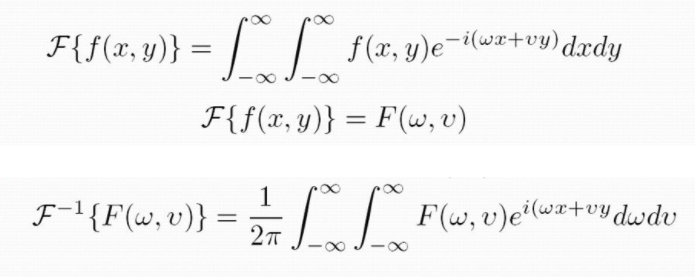

In [ ]:
img = cv.imread('fourierbi.png')
cv2_imshow(img)

**EXERCÍCIO**

Implemente as funções **dft(img)** e **idft(imgt)** mostradas abaixo, que calculem a transformada discreta e discreta inversa de fourier de uma imagem img e imgt,respectivamente. Sugestão: use  novamente o módulo **cmath** do Python que permite a manipulação de números complexos.

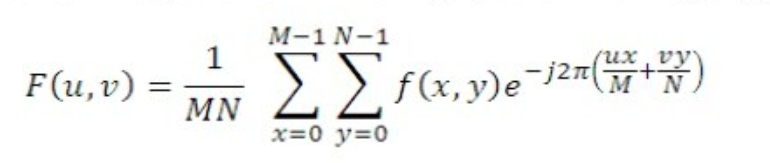

In [6]:
img = cv.imread('DFT2D.png')
cv2_imshow(img)

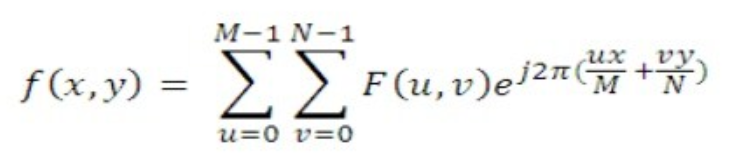

In [7]:
img = cv.imread('IDFT2D.png')
cv2_imshow(img)

In [8]:
import cmath

def dft(img):
  N,M=img.shape
  imgt=[[0.0 for v in range(M)] for u in range(N)] 
  for u in range(N):
    for v in range(M):
      for x in range(N):
        for y in range(M):
          imgt[u][v]+=img[x][y]*cmath.exp(-cmath.sqrt(-1)*2*3.14*(u*x/N+v*y/M))
  return imgt

def idft(imgt):
  N,M=imgt.shape
  img=[[0.0 for y in range(M)] for x in range(N)] 
  for x in range(N):
    for y in range(M):
      for u in range(N):
        for v in range(M):
          img[x][y]+=imgt[u][v]*cmath.exp(cmath.sqrt(-1)*2*3.14*(u*x/N+v*y/M))
  img=img/(N*M)
  return img

In [ ]:
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
print(img.shape)
cv2_imshow(img)
imgt=dft(img)
cv2_imshow(imgt)
img=idft(imgt)
cv2_imshow(img)

Podemos calcular esta transformada também usando o submódulo fft do numpy, porém agora usando o método fft2.

(512, 512)


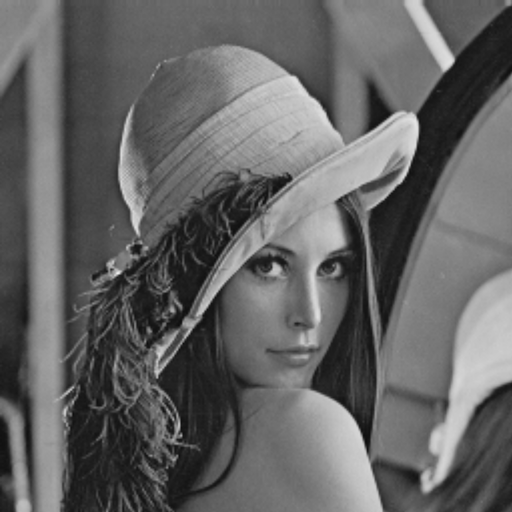

In [10]:
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
print(img.shape)
cv2_imshow(img)

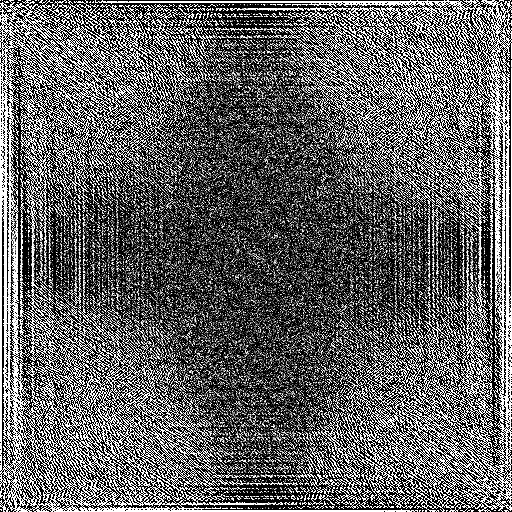

In [12]:
import numpy as np
imgf=np.fft.fft2(img)
cv2_imshow(imgf.real)

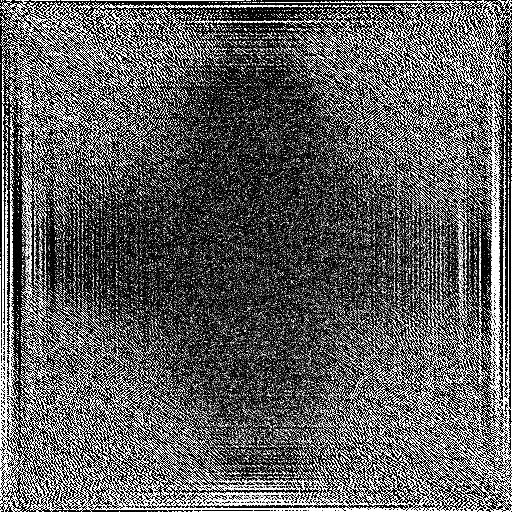

In [13]:
cv2_imshow(imgf.imag)

Para inverter o resultado da transformada bidimensional, usamos o código abaixo:

/usr/local/lib/python3.6/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


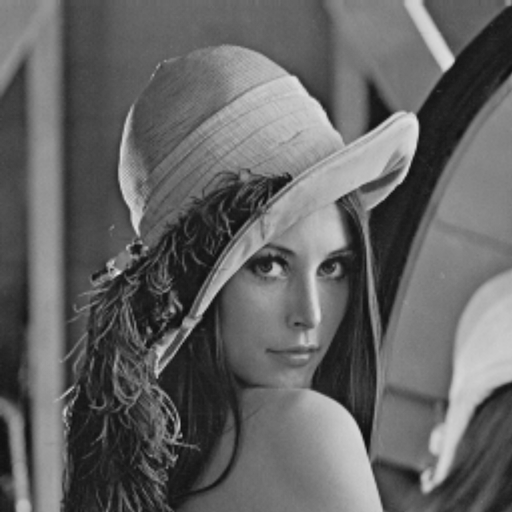

In [ ]:
img=np.fft.ifft2(imgf)
cv2_imshow(img)